In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn import metrics

data = pd.read_csv("/content/survey.csv")
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [3]:
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [4]:
data.tail()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN
1258,2016-02-01 23:04:31,25,Male,United States,IL,No,Yes,Yes,Sometimes,26-100,...,Don't know,Maybe,No,Some of them,No,No,No,Don't know,No,NaN


In [5]:
data.shape

(1259, 27)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

<Axes: xlabel='Country'>

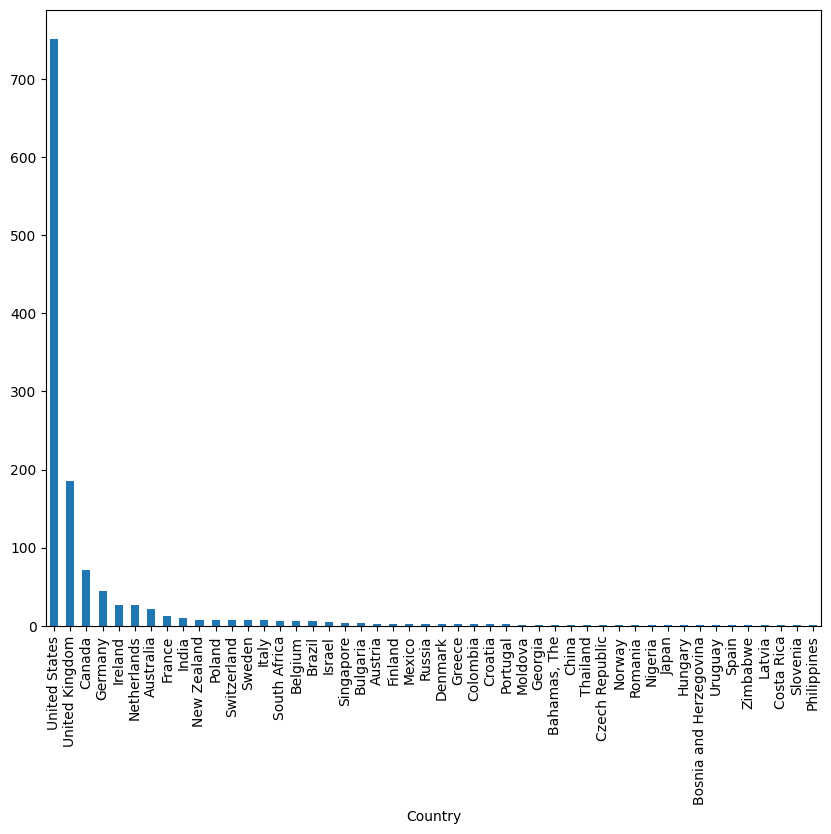

In [7]:
data['Country'].value_counts().plot(kind='bar',figsize=(10,8))

In [8]:
data.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [9]:
data=data.drop(['Timestamp'],axis=1)

In [10]:
data['self_employed'].value_counts()

self_employed
No     1095
Yes     146
Name: count, dtype: int64

In [11]:
data['self_employed'].fillna('No',inplace=True)

In [12]:
data['work_interfere'].value_counts()

work_interfere
Sometimes    465
Never        213
Rarely       173
Often        144
Name: count, dtype: int64

<Axes: xlabel='Age'>

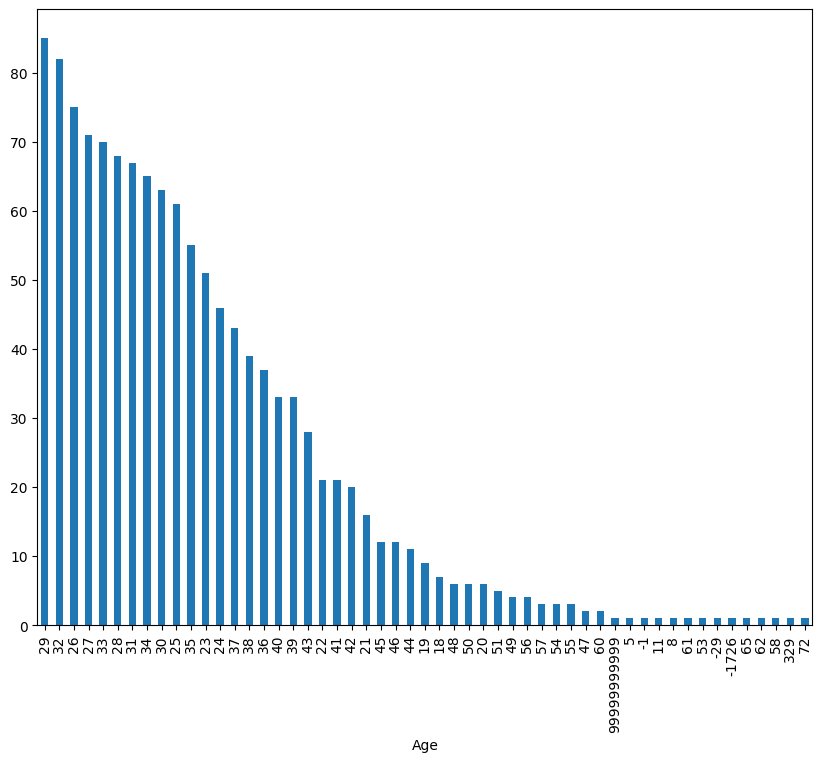

In [13]:
data['Age'].value_counts().plot(kind='bar',figsize=(10,8))

<Axes: xlabel='Gender'>

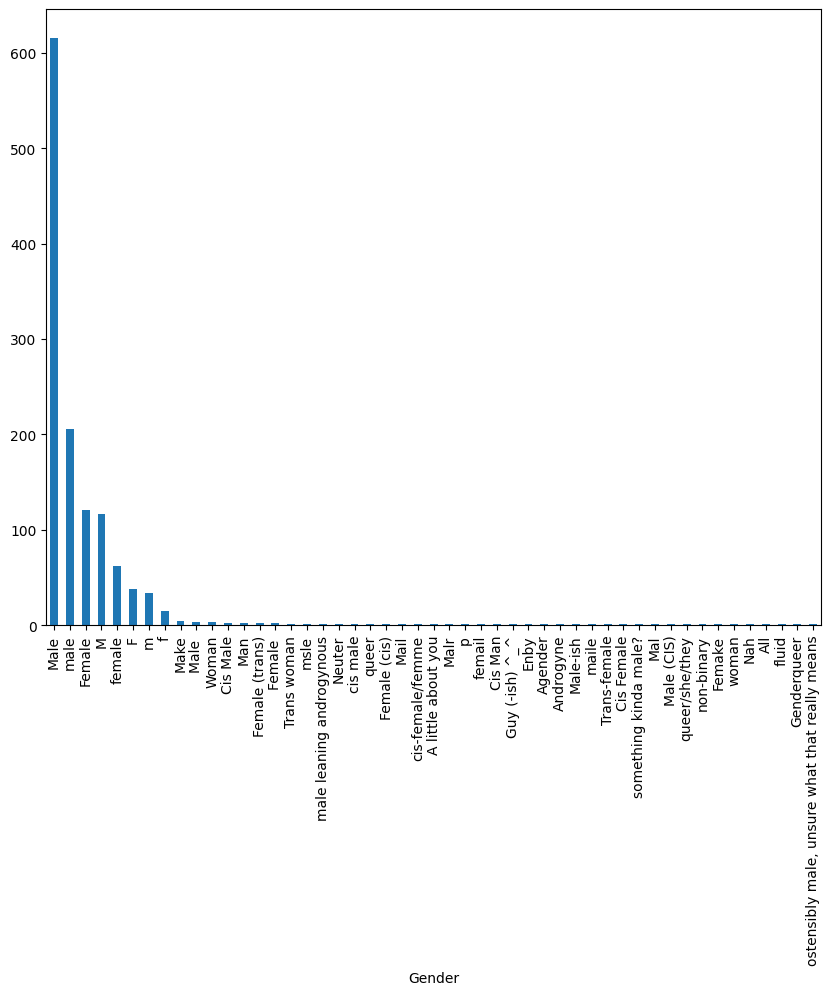

In [14]:
data['Gender'].value_counts().plot(kind='bar',figsize=(10,8))

In [15]:
data['Gender'].replace(['Male', 'male', 'M', 'm', 'Male', 'Cis Male',

'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',

'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make'], 'Male', inplace=True)

In [16]:
data['Gender'].replace(['Female', 'female', 'F', 'f', 'Woman', 'Female','femail','Cis Female','cis-female/femme','Femake','Female (cis)','woman'], 'Female', inplace=True)

In [17]:
data["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary', 'Fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous', 'Agender', 'A little about you', 'Nah', 'All', 'ostensibly male, unsure what that really means', 'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?', 'Guy (-ish)^^', 'Trans woman'], 'Non-Binary', inplace=True)

<ipython-input-18-45c49f9722e1>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Age"])


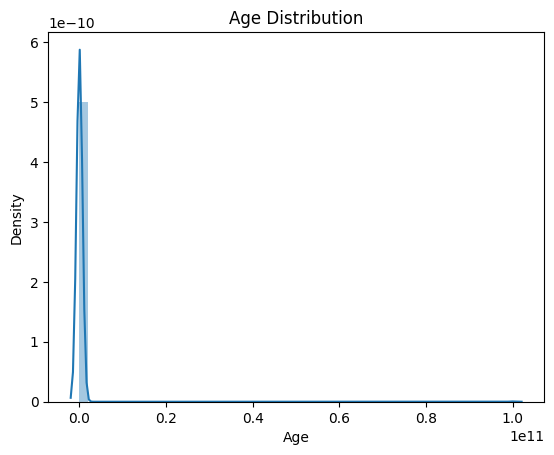

In [18]:
import seaborn as sns
sns.distplot(data["Age"])
plt.title("Age Distribution")
plt.xlabel("Age")
plt.show()

Text(0.5, 1.0, 'Employment Type')

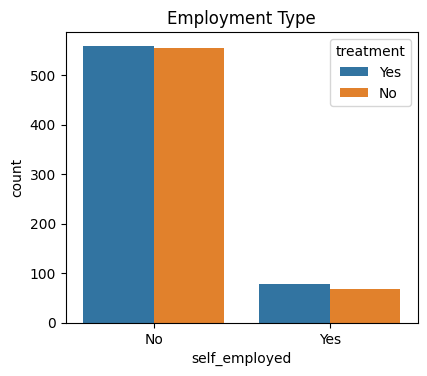

In [19]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,1)
sns.countplot(data=data, x='self_employed', hue='treatment')
plt.title('Employment Type')

Text(0.5, 1.0, 'Family History')

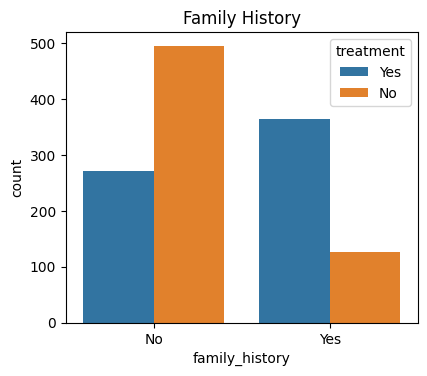

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,40))
plt.subplot(9,2,2)
sns.countplot(data=data,x='family_history',hue='treatment')
plt.title('Family History')

Text(0.5, 1.0, 'Work Interference')

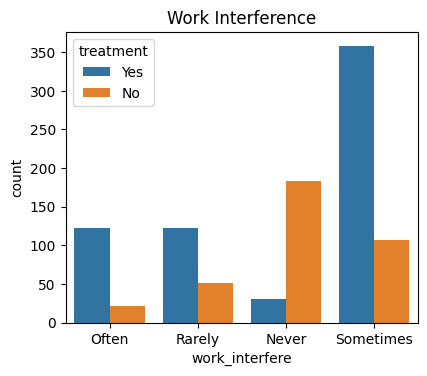

In [21]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,3)
sns.countplot(data=data,x='work_interfere',hue='treatment')
plt.title('Work Interference')

Text(0.5, 1.0, 'Work Type')

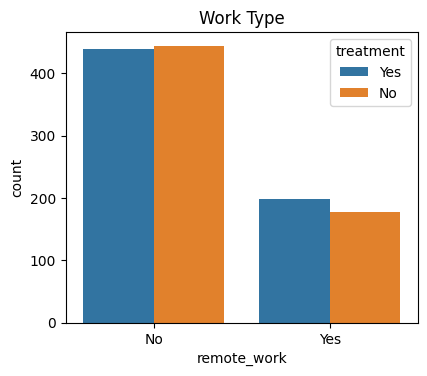

In [22]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,4)
sns.countplot(data=data,x='remote_work',hue='treatment')
plt.title('Work Type')

Text(0.5, 1.0, 'leave')

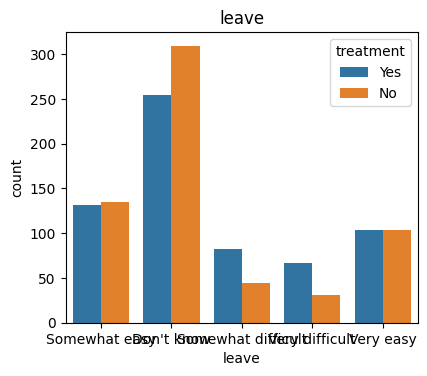

In [23]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,11)
sns.countplot(data=data,x='leave',hue='treatment')
plt.title('leave')

Text(0.5, 1.0, 'company')

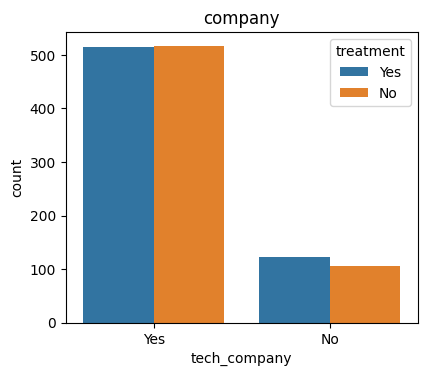

In [24]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,5)
sns.countplot(data=data,x='tech_company',hue='treatment')
plt.title('company')

Text(0.5, 1.0, 'benefits')

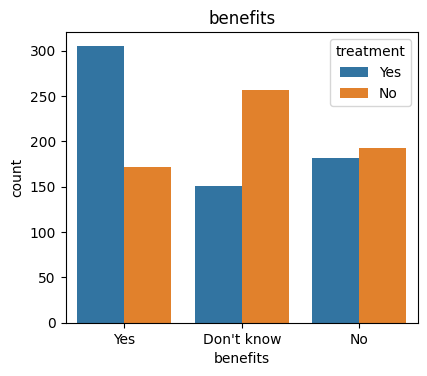

In [25]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,6)
sns.countplot(data=data,x='benefits',hue='treatment')
plt.title('benefits')

Text(0.5, 1.0, 'care options')

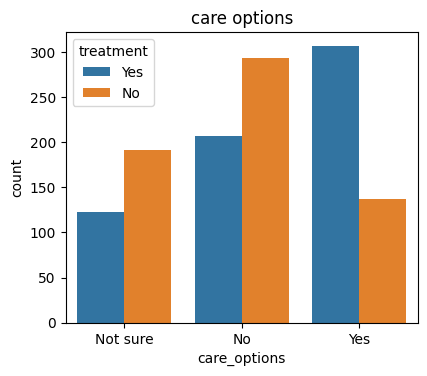

In [26]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,7)
sns.countplot(data=data,x='care_options',hue='treatment')
plt.title('care options')

Text(0.5, 1.0, 'equal importance to mental and physical health')

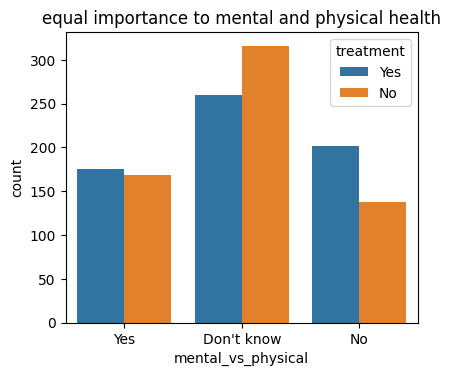

In [27]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,8)
sns.countplot(data=data,x='mental_vs_physical',hue='treatment')
plt.title('equal importance to mental and physical health')

Text(0.5, 1.0, 'wellness program')

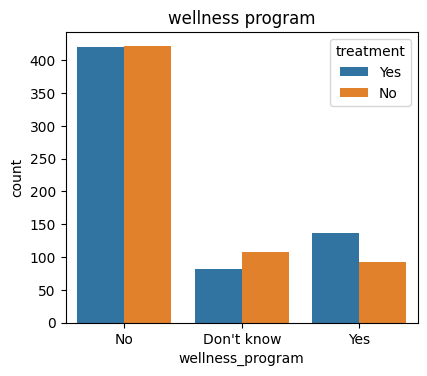

In [28]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,9)
sns.countplot(data=data,x='wellness_program',hue='treatment')
plt.title('wellness program')

Text(0.5, 1.0, 'Anonymity')

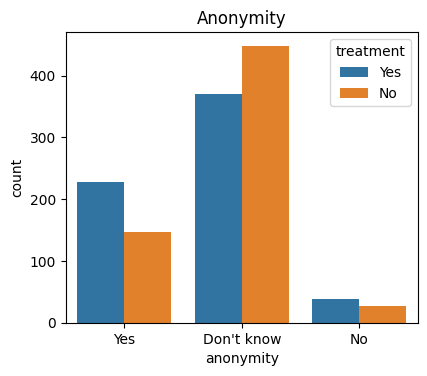

In [29]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,10)
sns.countplot(data=data,x='anonymity',hue='treatment')
plt.title('Anonymity')

Text(0.5, 1.0, 'mental health consequence')

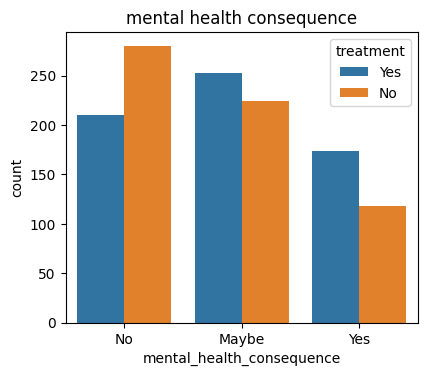

In [30]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,12)
sns.countplot(data=data,x='mental_health_consequence',hue='treatment')
plt.title('mental health consequence')

Text(0.5, 1.0, 'Physical Health Consequnce')

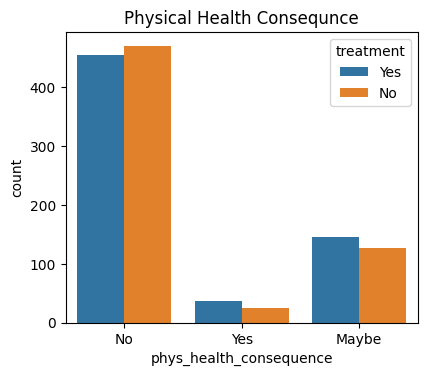

In [31]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,13)
sns.countplot(data=data,x='phys_health_consequence',hue='treatment')
plt.title('Physical Health Consequnce')

Text(0.5, 1.0, 'Discussion with coworkers')

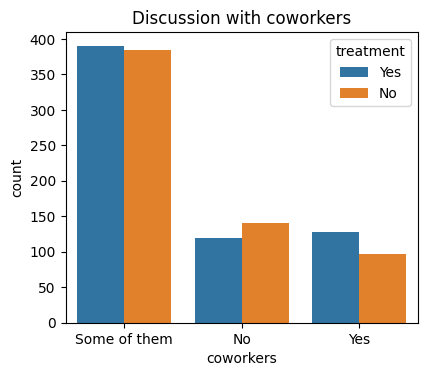

In [32]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,14)
sns.countplot(data=data,x='coworkers',hue='treatment')
plt.title('Discussion with coworkers')

Text(0.5, 1.0, 'Discussion with supervisor')

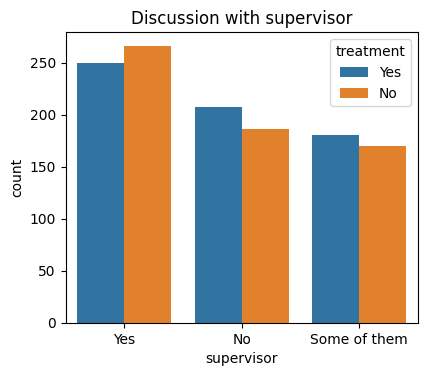

In [33]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,15)
sns.countplot(data=data,x='supervisor',hue='treatment')
plt.title('Discussion with supervisor')

Text(0.5, 1.0, 'Discussion with Interviewer(Mental )')

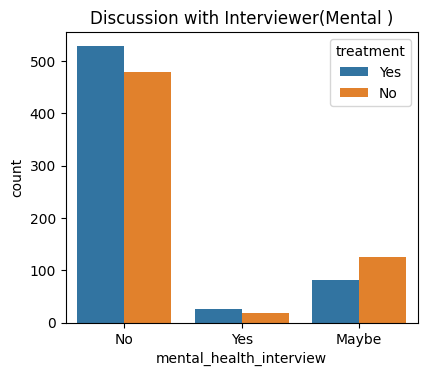

In [34]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,16)
sns.countplot(data=data,x='mental_health_interview',hue='treatment')
plt.title('Discussion with Interviewer(Mental )')

Text(0.5, 1.0, 'Discussion with Interviewer(Physical)')

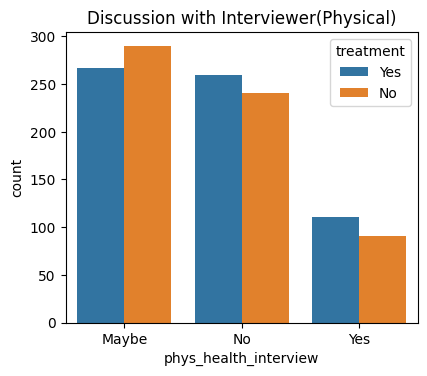

In [35]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,17)
sns.countplot(data=data,x='phys_health_interview',hue='treatment')
plt.title('Discussion with Interviewer(Physical)')

Text(0.5, 1.0, 'Consequence after Discussion')

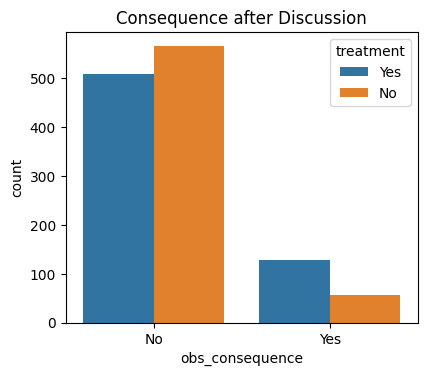

In [36]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,18)
sns.countplot(data=data,x='obs_consequence',hue='treatment')
plt.title('Consequence after Discussion')

In [37]:
  data.describe(include='all')

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
count,1.259000e+03,1259,1259,744,1259,1259,1259,995,1259,1259,...,1259,1259,1259,1259,1259,1259,1259,1259,1259,164
unique,NaN,7,48,45,2,2,2,4,6,2,...,5,3,3,3,3,3,3,3,2,160
top,NaN,Male,United States,CA,No,No,Yes,Sometimes,6-25,No,...,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,* Small family business - YMMV.
freq,NaN,988,751,138,1113,767,637,465,290,883,...,563,490,925,774,516,1008,557,576,1075,5
mean,7.942815e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.818299e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,-1.726000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.700000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3.100000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3.600000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
data.tail()

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
1254,26,Male,United Kingdom,NaN,No,No,Yes,NaN,26-100,No,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,32,Male,United States,IL,No,Yes,Yes,Often,26-100,Yes,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,34,Male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,No,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,46,Female,United States,NC,No,No,No,NaN,100-500,Yes,...,Don't know,Yes,No,No,No,No,No,No,No,NaN
1258,25,Male,United States,IL,No,Yes,Yes,Sometimes,26-100,No,...,Don't know,Maybe,No,Some of them,No,No,No,Don't know,No,NaN


In [39]:
x=data.drop(['treatment'],axis = 1)
y=data['treatment']

In [40]:
x.head()


,Age,Gender,Country,state,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,37,Female,United States,IL,No,No,Often,6-25,No,Yes,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,44,Male,United States,IN,No,No,Rarely,More than 1000,No,No,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,31,Male,United Kingdom,NaN,No,Yes,Often,26-100,No,Yes,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,31,Male,United States,TX,No,No,Never,100-500,Yes,Yes,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [41]:
import pandas as pd # Import pandas library

# Assuming 'data' is your Pandas DataFrame
y = data['treatment']

# Convert the NumPy array 'y' back to a Pandas Series if you need to use .head()
y = pd.Series(y)

y.head()

0    Yes
1     No
2     No
3    Yes
4     No
Name: treatment, dtype: object

In [42]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

In [43]:
x=data.drop(['treatment'],axis = 1)
y=data['treatment']
x = pd.DataFrame(x)

In [44]:
ct =  ColumnTransformer([('oe',OrdinalEncoder(),['Gender','self_employed','family_history','work_interfere','no_employees','remote_work','tech_company','benefits','care_options','wellness_program','seek_help','anonymity','leave','mental_health_consequence','phys_health_consequence','coworkers','supervisor','mental_health_interview','phys_health_interview','mental_vs_physical','obs_consequence'])],remainder='passthrough')

In [45]:
oe = OrdinalEncoder()
for col in x.columns:
  if x[col].dtype == 'object':
    x[col] = oe.fit_transform(x[col].values.reshape(-1,1))

In [46]:
x.head()

,Age,Gender,Country,state,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,37,0.0,45.0,10.0,0.0,0.0,1.0,4.0,0.0,1.0,...,2.0,1.0,1.0,1.0,2.0,1.0,0.0,2.0,0.0,NaN
1,44,3.0,45.0,11.0,0.0,0.0,2.0,5.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN
2,32,3.0,7.0,NaN,0.0,0.0,2.0,4.0,0.0,1.0,...,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,0.0,NaN
3,31,3.0,44.0,NaN,0.0,1.0,1.0,2.0,0.0,1.0,...,1.0,2.0,2.0,1.0,0.0,0.0,0.0,1.0,1.0,NaN
4,31,3.0,45.0,37.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,2.0,2.0,2.0,0.0,0.0,NaN


In [47]:
x["obs_consequence"].value_counts()

obs_consequence
0.0    1075
1.0     184
Name: count, dtype: int64

In [48]:
le=LabelEncoder()
y=le.fit_transform(y)

In [49]:
import joblib
joblib.dump(ct,'feature_values')

['feature_values']

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=49)

In [51]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1007, 25), (252, 25), (1007,), (252,))

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [53]:
model_dict={}

model_dict['LogisticRegression']=LogisticRegression(solver='liblinear',random_state=49)
model_dict['KNN classifier']=KNeighborsClassifier()
model_dict['DecisionTreeClassifier']=DecisionTreeClassifier(random_state=49)
model_dict['RandomForestClassifier']=RandomForestClassifier(random_state=49)
model_dict['AdaBoostClassifier']=AdaBoostClassifier(random_state=49)
model_dict['GradientBoostingClassifier']=GradientBoostingClassifier(random_state=49)
model_dict['XGBClassifier']=XGBClassifier(random_state=49)

In [54]:
def model_test(x_train,x_test,y_train,y_test,model,model_name):
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  accuracy=accuracy_score(y_test,y_pred)
  print('score is :{}'.format(accuracy))
  print()

In [55]:
from sklearn.impute import SimpleImputer

# Before calling model_test, impute missing values in x_train and x_test
imputer = SimpleImputer(strategy='mean') # Or another strategy like 'median'
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

for model_name,model in model_dict.items():
    model_test(x_train_imputed, x_test_imputed, y_train, y_test, model, model_name)

score is :0.5198412698412699

score is :0.5952380952380952

score is :0.7857142857142857

score is :0.7817460317460317

score is :0.8333333333333334

score is :0.8333333333333334

score is :0.8373015873015873



In [56]:
abc=AdaBoostClassifier(random_state=99)
abc.fit(x_train_imputed,y_train)
pred_abc=abc.predict(x_test_imputed)
print('Accuracy of AdaBoost=',accuracy_score(y_test,pred_abc))

Accuracy of AdaBoost= 0.8333333333333334


In [57]:
from sklearn.model_selection import RandomizedSearchCV
params_abc = {'n_estimators': [int(x) for x in np.linspace(start=1, stop=50, num=15)],
              'learning_rate': [(0.97 + x / 100) for x in range(0, 8)], }
abc_random = RandomizedSearchCV(random_state=49, estimator=abc, param_distributions=params_abc,
                               n_iter=50, cv=5, n_jobs=-1)

In [58]:
params_abc

{'n_estimators': [1, 4, 8, 11, 15, 18, 22, 25, 29, 32, 36, 39, 43, 46, 50],
 'learning_rate': [0.97, 0.98, 0.99, 1.0, 1.01, 1.02, 1.03, 1.04]}

In [59]:
abc_random.fit(x_train_imputed,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=99),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': [0.97, 0.98, 0.99, 1.0,
                                                          1.01, 1.02, 1.03,
                                                          1.04],
                                        'n_estimators': [1, 4, 8, 11, 15, 18,
                                                         22, 25, 29, 32, 36, 39,
                                                         43, 46, 50]},
                   random_state=49)

In [60]:
abc_random.best_params_

{'n_estimators': 29, 'learning_rate': 1.0}

In [61]:
abc_tuned=AdaBoostClassifier(random_state=49,n_estimators=11,learning_rate=1.02)
abc_tuned.fit(x_train_imputed,y_train)
pred_abc_tuned=abc_tuned.predict(x_test_imputed)
print('Accuracy of AdaBoost(tuned)=',accuracy_score(y_test,pred_abc_tuned))

Accuracy of AdaBoost(tuned)= 0.8214285714285714


Text(50.722222222222214, 0.5, 'Actual')

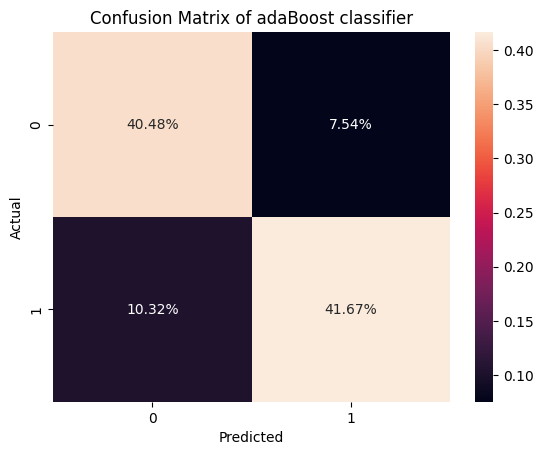

In [62]:
cf_matrix=confusion_matrix(y_test,pred_abc_tuned)
sns.heatmap(cf_matrix/np.sum(cf_matrix),annot=True,fmt='.2%')
plt.title('Confusion Matrix of adaBoost classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')

Text(50.722222222222214, 0.5, 'Actual')

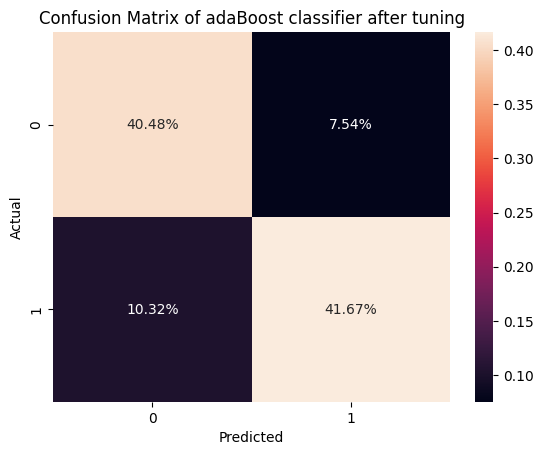

In [63]:
cf_matrix=confusion_matrix(y_test,pred_abc_tuned)
sns.heatmap(cf_matrix/np.sum(cf_matrix),annot=True,fmt='.2%')
plt.title('Confusion Matrix of adaBoost classifier after tuning')
plt.xlabel('Predicted')
plt.ylabel('Actual')

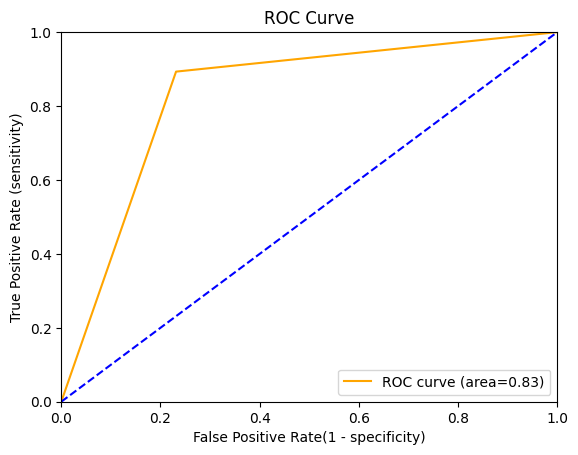

(array([0.        , 0.23140496, 1.        ]),
 array([0.        , 0.89312977, 1.        ]),
 array([2, 1, 0]))

In [64]:
fpr_abc, tpr_abc, thresholds_abc = roc_curve(y_test, pred_abc)
roc_auc_abc = metrics.auc(fpr_abc, tpr_abc)
plt.plot(fpr_abc, tpr_abc, color="orange", label='ROC curve (area=%0.2f)'%roc_auc_abc)
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate(1 - specificity)')
plt.ylabel('True Positive Rate (sensitivity)')
plt.legend(loc="lower right")
plt.show()
roc_curve(y_test,pred_abc)

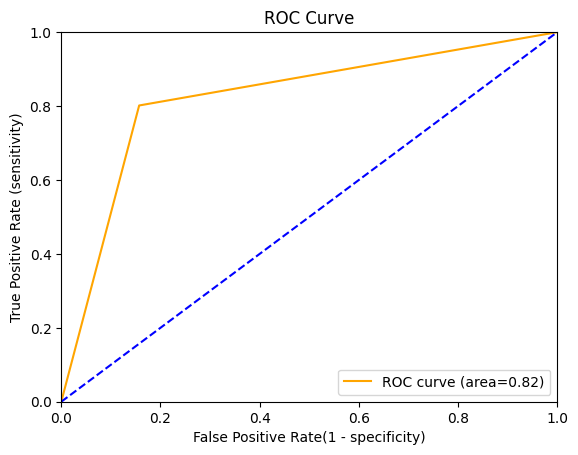

(array([0.        , 0.15702479, 1.        ]),
 array([0.        , 0.80152672, 1.        ]),
 array([2, 1, 0]))

In [65]:
fpr_abc_tuned, tpr_abc_tuned, thresholds_abc_tuned = roc_curve(y_test, pred_abc_tuned)
roc_auc_abc_tuned = metrics.auc(fpr_abc_tuned, tpr_abc_tuned)
plt.plot(fpr_abc_tuned, tpr_abc_tuned, color="orange", label='ROC curve (area=%0.2f)'%roc_auc_abc_tuned)
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate(1 - specificity)')
plt.ylabel('True Positive Rate (sensitivity)')
plt.legend(loc="lower right")
plt.show()
roc_curve(y_test,pred_abc_tuned)

In [66]:
print(classification_report(y_test,pred_abc))

              precision    recall  f1-score   support

           0       0.87      0.77      0.82       121
           1       0.81      0.89      0.85       131

    accuracy                           0.83       252
   macro avg       0.84      0.83      0.83       252
weighted avg       0.84      0.83      0.83       252



In [67]:
print(classification_report(y_test,pred_abc_tuned))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       121
           1       0.85      0.80      0.82       131

    accuracy                           0.82       252
   macro avg       0.82      0.82      0.82       252
weighted avg       0.82      0.82      0.82       252



In [68]:
import pickle
pickle.dump(abc_tuned,open('model.pkl','wb'))